In [379]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score

In [380]:
df = pd.read_csv("insurance.csv")

In [381]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [383]:
df = df.dropna()

In [384]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50.0,male,30.97,3.0,no,Northwest,$10600.5483
1334,-18.0,female,31.92,0.0,no,Northeast,2205.9808
1335,18.0,female,36.85,0.0,no,southeast,$1629.8335
1336,21.0,female,25.80,0.0,no,southwest,2007.945
1337,61.0,female,29.07,0.0,yes,northwest,29141.3603


In [385]:
df["age"].value_counts()

age
 18.0    61
 19.0    60
 48.0    28
 54.0    27
 24.0    27
         ..
-58.0     1
-44.0     1
-26.0     1
-28.0     1
-33.0     1
Name: count, Length: 80, dtype: int64

In [386]:
df["age"] = abs(df["age"]).astype(int)

In [387]:
df["age"].value_counts()

age
18    64
19    62
51    29
48    28
54    27
24    27
20    26
26    26
44    26
45    26
27    26
29    26
42    26
50    26
23    25
52    25
25    25
57    25
55    25
46    25
47    25
40    25
38    24
58    24
21    24
49    24
53    24
39    24
28    24
33    24
31    24
22    24
37    24
34    23
32    23
56    22
41    22
59    22
35    22
36    22
62    21
63    21
61    21
30    21
43    20
60    20
64    19
Name: count, dtype: int64

In [388]:
df["sex"].value_counts()

sex
male      495
female    479
M          61
woman      60
man        57
F          56
Name: count, dtype: int64

In [389]:
sex_replace = {
  "man" : "male",
  "M" : "male",
  "woman" : "female",
  "F" : "female" 
}

df["sex"] = df["sex"].replace(sex_replace)

In [390]:
df["sex"].value_counts()

sex
male      613
female    595
Name: count, dtype: int64

In [391]:
df["bmi"].sort_values()
df["bmi"] = df["bmi"].round(1)

In [392]:
df["children"].value_counts()

children
 0.0    528
 1.0    274
 2.0    198
 3.0    130
 4.0     20
-1.0     18
 5.0     16
-2.0     12
-3.0      9
-4.0      3
Name: count, dtype: int64

In [393]:
df["children"] = abs(df["children"]).astype(int)


In [394]:
df["children"].value_counts()

children
0    528
1    292
2    210
3    139
4     23
5     16
Name: count, dtype: int64

In [395]:
df["region"].value_counts()

region
Southeast    164
southeast    158
southwest    157
Northwest    149
Northeast    149
northeast    146
northwest    145
Southwest    140
Name: count, dtype: int64

In [396]:
df["region"] = df["region"].str.lower()

In [397]:
df["region"].value_counts()

region
southeast    322
southwest    297
northeast    295
northwest    294
Name: count, dtype: int64

In [398]:
df["charges"] = df["charges"].str.replace("$", "")
df['charges'] = pd.to_numeric(df['charges'], errors='coerce')


In [399]:
df = df.dropna()

In [400]:
df["charges"] = df["charges"].astype(int)

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1207 non-null   int64  
 1   sex       1207 non-null   object 
 2   bmi       1207 non-null   float64
 3   children  1207 non-null   int64  
 4   smoker    1207 non-null   object 
 5   region    1207 non-null   object 
 6   charges   1207 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 75.4+ KB


In [402]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884
1,18,male,33.8,1,no,southeast,1725
2,28,male,33.0,3,no,southeast,4449
3,33,male,22.7,0,no,northwest,21984
4,32,male,28.9,0,no,northwest,3866
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600
1334,18,female,31.9,0,no,northeast,2205
1335,18,female,36.8,0,no,southeast,1629
1336,21,female,25.8,0,no,southwest,2007


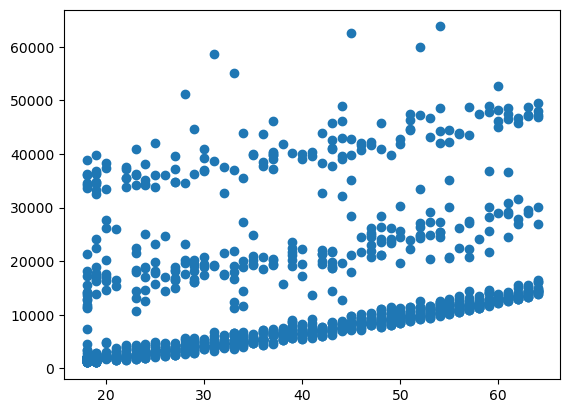

In [403]:
plt.scatter(x=df["age"],y=df["charges"])

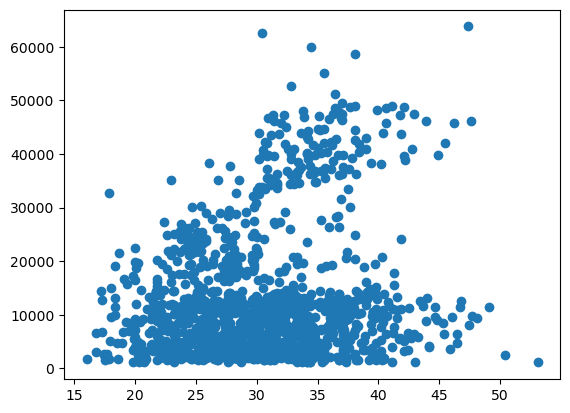

In [404]:
plt.scatter(x=df["bmi"],y=df["charges"])

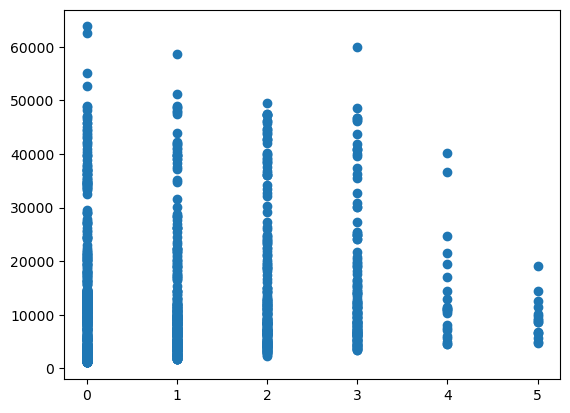

In [405]:
plt.scatter(x=df["children"],y=df["charges"])

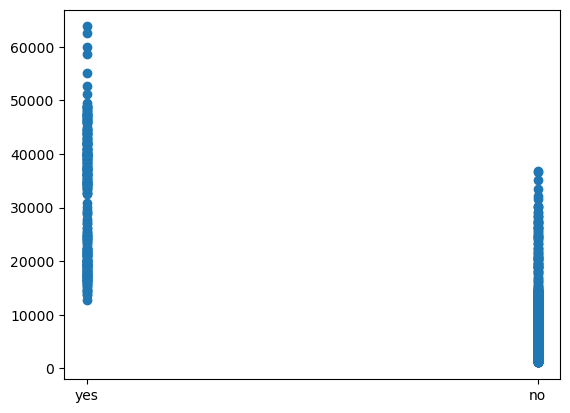

In [406]:
plt.scatter(x=df["smoker"],y=df["charges"])

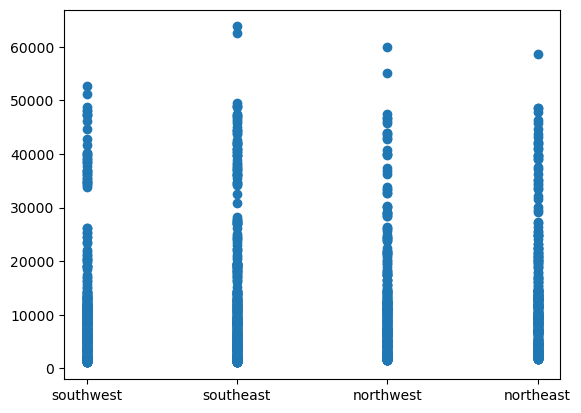

In [407]:
plt.scatter(x=df["region"],y=df["charges"])

In [408]:
df  = pd.get_dummies(df, columns=["sex", "region","smoker"], dtype=int)

In [409]:
scaler = StandardScaler()

ls = ["age","bmi","children","charges"]
for i in ls:
  scaler.fit(df[[i]])
  df[i] = scaler.transform(df[[i]])

In [410]:
X = df.drop(["charges"],axis=1)
y = df["charges"]

In [429]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [430]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [431]:
y_pred = reg.predict(X_test)


In [432]:
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test) 
print(f"r2_score: {r2}, mse: {mse}")

r2_score: 0.6409310274770179, mse: 0.27703840188659085
